In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import DataLoader
from facenet_pytorch import MTCNN , InceptionResnetV1
from PIL import Image

## Load Datset

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataset = torchvision.datasets.ImageFolder("./Dataset/" )
classes = { i : dataset.classes[i] for i in range(len(dataset.classes))}
def collate_fn(x):
    return x[0]

data_loader = DataLoader(dataset=dataset , collate_fn=collate_fn)


## Create Model

In [4]:
model = MTCNN(image_size=160, margin=2 , min_face_size=10 , device=device).eval()
resnet = InceptionResnetV1(pretrained='vggface2').eval()
embed_list = []
class_names = []

for i,(input, label) in enumerate(data_loader):
    path = "faces/face "+str(i+1)+".png"
    face_tensor, prob = model(input, save_path=path, return_prob=True)
    if face_tensor is not None:
        embeded = resnet(face_tensor.unsqueeze(0))
        embed_list.append(embeded)
        class_names.append(label)

## Predict New Image


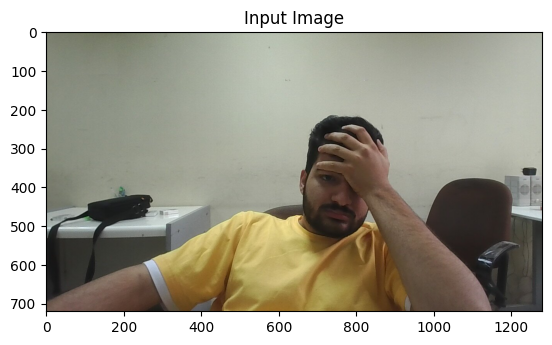

face detected wuth 1.00 probibility

this person is MohamadrezaJafaei 


In [10]:
def predict_image(address,embed_list , class_names):
    img = Image.open(address)
    plt.title("Input Image")
    plt.imshow(img)
    plt.show()
    path = "face-test.png"


    face_tensor, prob = model(img, save_path=path, return_prob=True)
    print(f"face detected wuth {prob:.2f} probibility")
    print()

    embeded = resnet(face_tensor.unsqueeze(0))
    distances=[]
    
    for embed_data in embed_list:
        distances.append(torch.dist(embeded , embed_data).item())
    best_index = np.argmin(distances)
    print(f"this person is {classes[class_names[best_index]]} ")


predict_image("test7.jpg", embed_list , class_names)
